## Notebook containing code used for manuscript figure 6

## Packages

In [2]:
import warnings
import anndata as ad
import spateo as st
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="ticks", font_scale=1)
warnings.filterwarnings('ignore')

## Figure 6a- 3D reconstructed models of the whole heart and each major anatomical structure

|-----> Length (x) of model: 0.26318;
|-----> Width (y) of model: 0.50628;
|-----> Height (z) of model: 0.35438;
|-----> Surface area of model: 0.42624;
|-----> Volume of model: 0.02061;
|-----> Volume / surface area ratio of model: 0.04835.
|-----> Cell density of model: 959728.28724.
|-----> Length (x) of model: 0.61596;
|-----> Width (y) of model: 0.85348;
|-----> Height (z) of model: 0.75051;
|-----> Surface area of model: 1.65875;
|-----> Volume of model: 0.17666;
|-----> Volume / surface area ratio of model: 0.1065.
|-----> Cell density of model: 560206.04551.
Amount of rough clusters: 5233.
Amount of rough clusters: 14366.


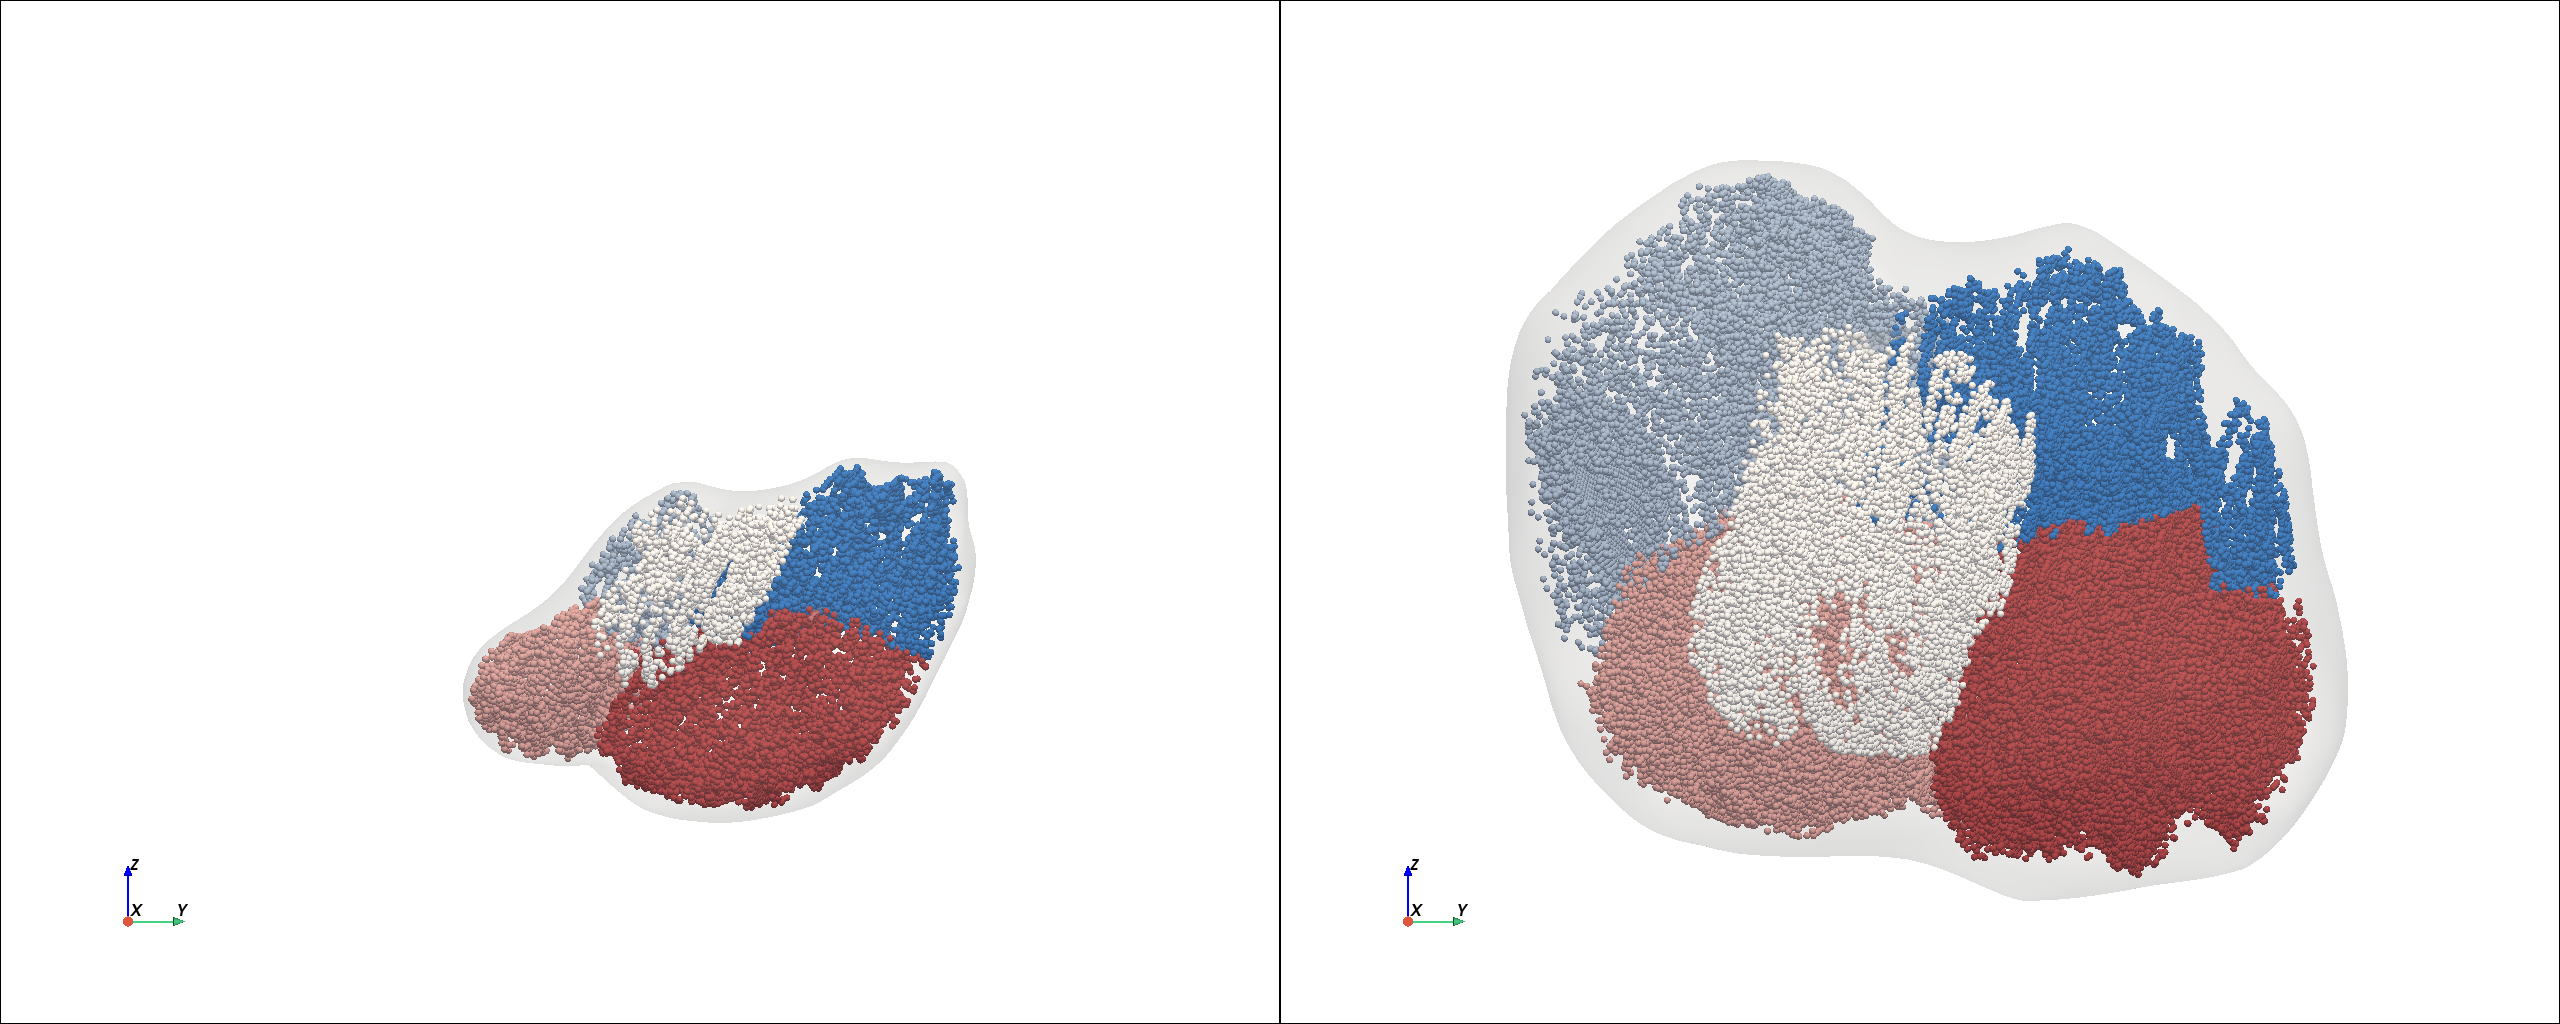

|-----> Length (x) of model: 0.18596;
|-----> Width (y) of model: 0.32663;
|-----> Height (z) of model: 0.20909;
|-----> Surface area of model: 0.18336;
|-----> Volume of model: 0.00652;
|-----> Volume / surface area ratio of model: 0.03556.
|-----> Cell density of model: 1118251.53374.
|-----> Length (x) of model: 0.36928;
|-----> Width (y) of model: 0.41542;
|-----> Height (z) of model: 0.39664;
|-----> Surface area of model: 0.5035;
|-----> Volume of model: 0.02916;
|-----> Volume / surface area ratio of model: 0.05791.
|-----> Cell density of model: 1078635.1166.
Amount of rough clusters: 903.
Amount of rough clusters: 9345.


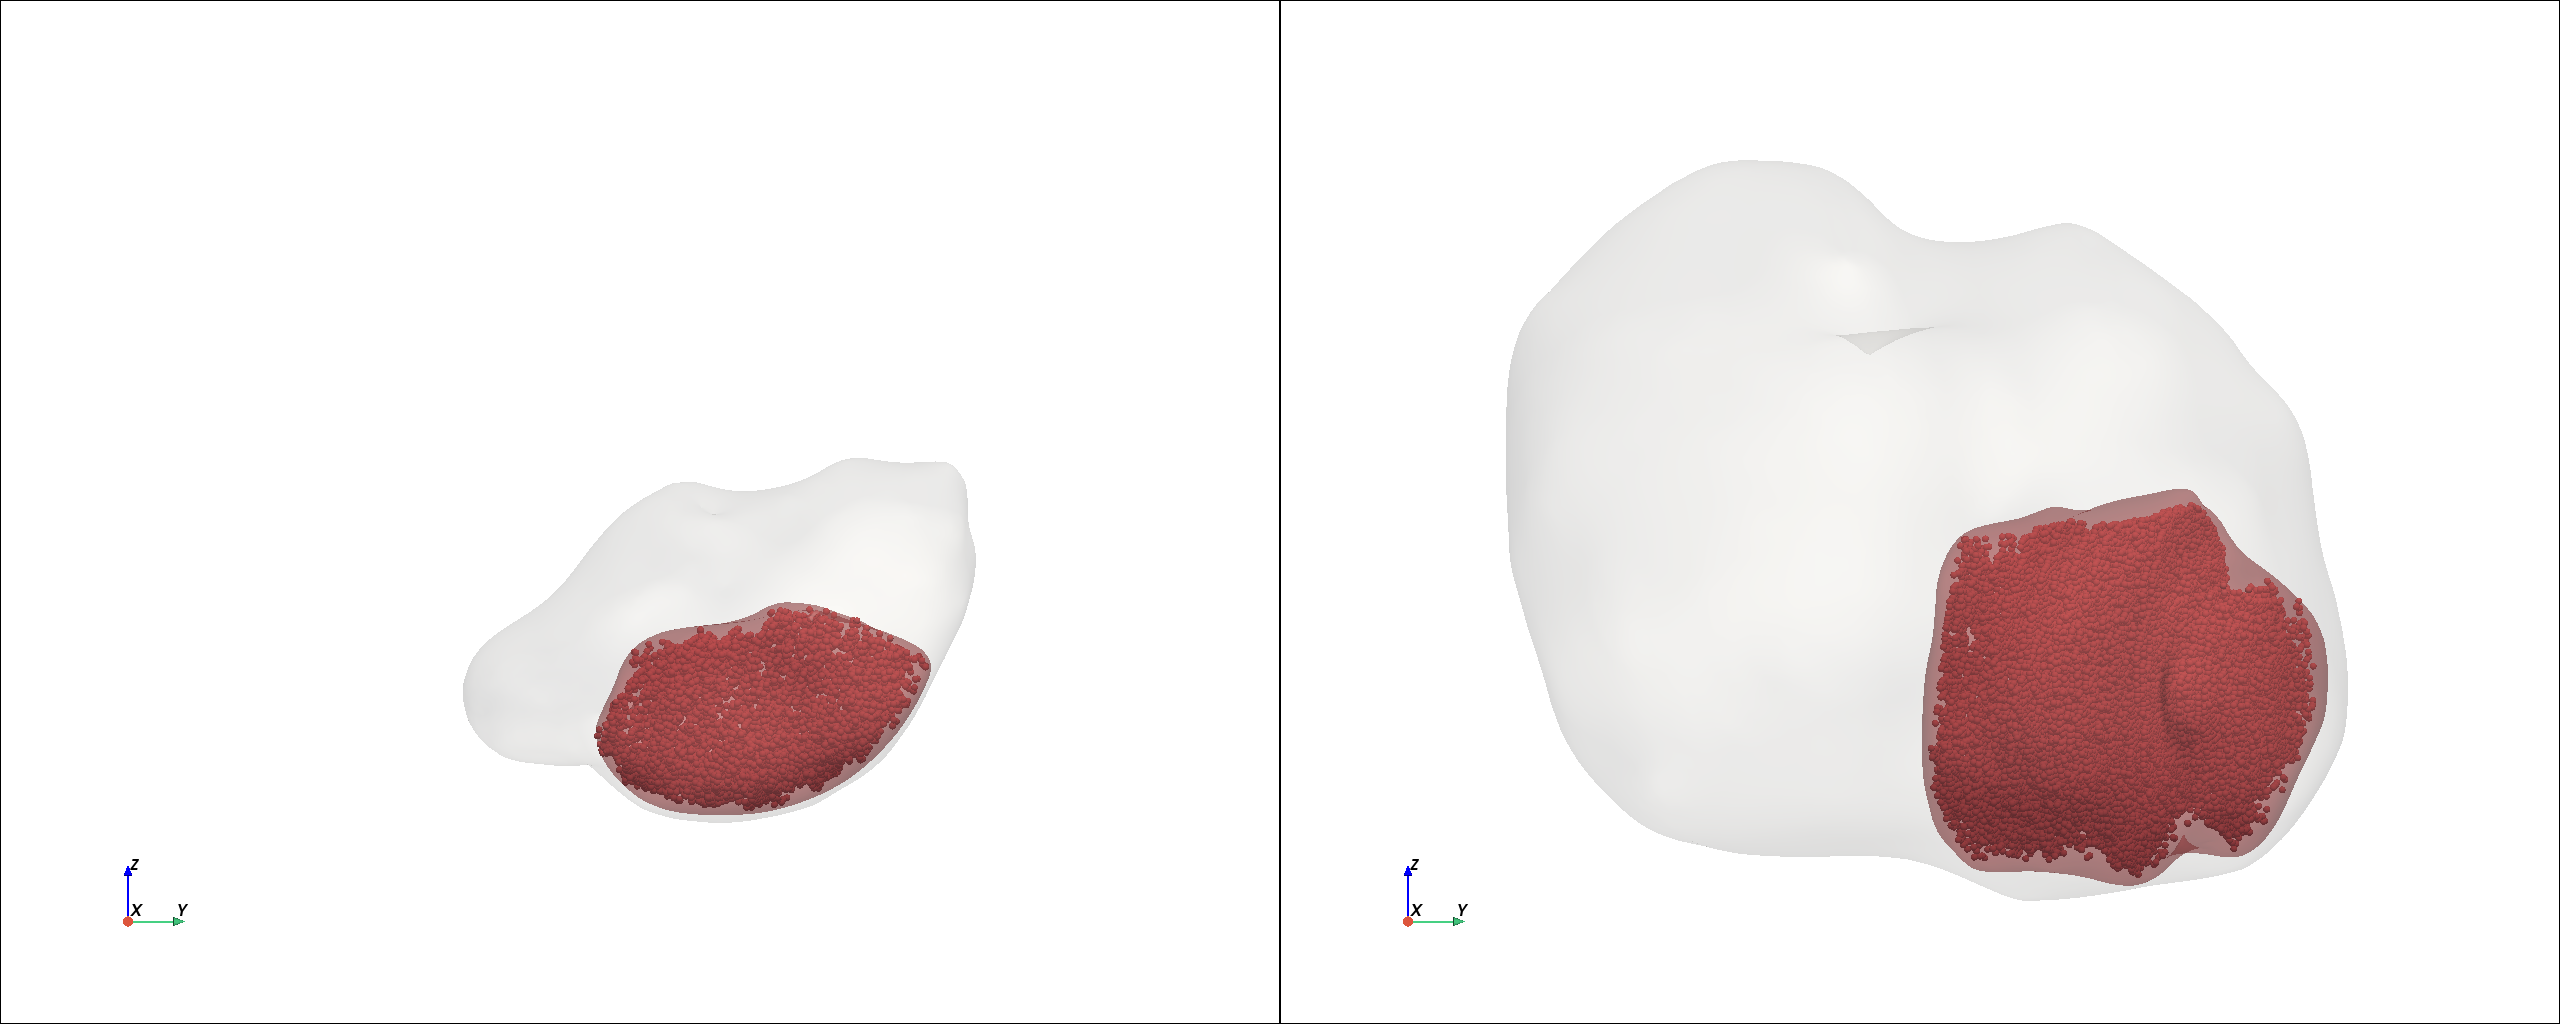

|-----> Length (x) of model: 0.23324;
|-----> Width (y) of model: 0.19333;
|-----> Height (z) of model: 0.17856;
|-----> Surface area of model: 0.11804;
|-----> Volume of model: 0.00333;
|-----> Volume / surface area ratio of model: 0.02821.
|-----> Cell density of model: 1019219.21922.
|-----> Length (x) of model: 0.45703;
|-----> Width (y) of model: 0.46002;
|-----> Height (z) of model: 0.38767;
|-----> Surface area of model: 0.58324;
|-----> Volume of model: 0.03776;
|-----> Volume / surface area ratio of model: 0.06474.
|-----> Cell density of model: 864724.57627.
Amount of rough clusters: 261.
Amount of rough clusters: 9511.


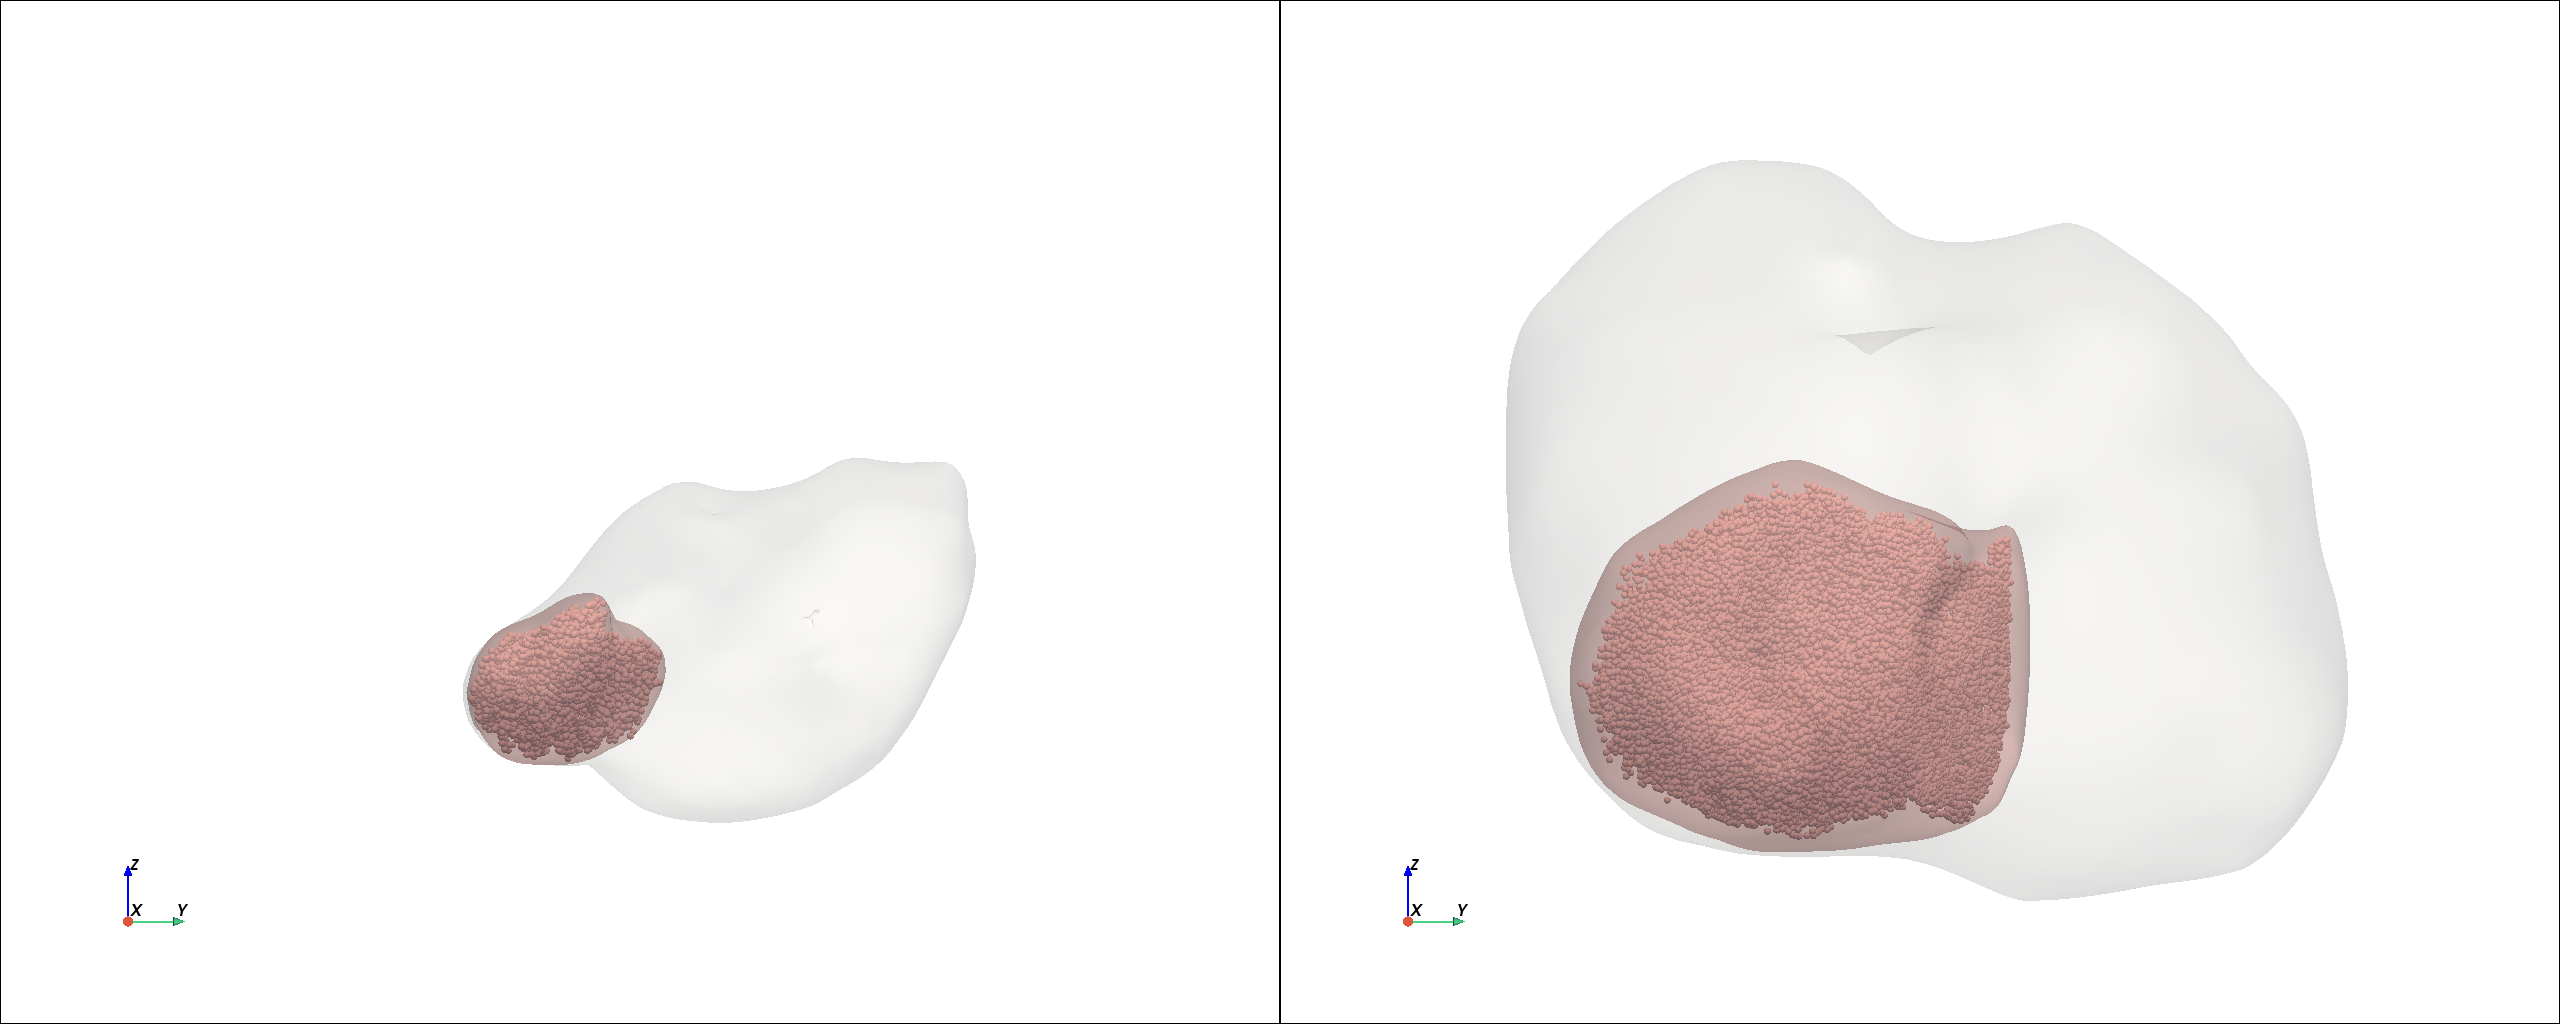

|-----> Length (x) of model: 0.156;
|-----> Width (y) of model: 0.21226;
|-----> Height (z) of model: 0.18531;
|-----> Surface area of model: 0.09658;
|-----> Volume of model: 0.0024;
|-----> Volume / surface area ratio of model: 0.02485.
|-----> Cell density of model: 795416.66667.
|-----> Length (x) of model: 0.27242;
|-----> Width (y) of model: 0.36147;
|-----> Height (z) of model: 0.44235;
|-----> Surface area of model: 0.41181;
|-----> Volume of model: 0.02171;
|-----> Volume / surface area ratio of model: 0.05272.
|-----> Cell density of model: 384154.76739.
Amount of rough clusters: 75.
Amount of rough clusters: 1956.


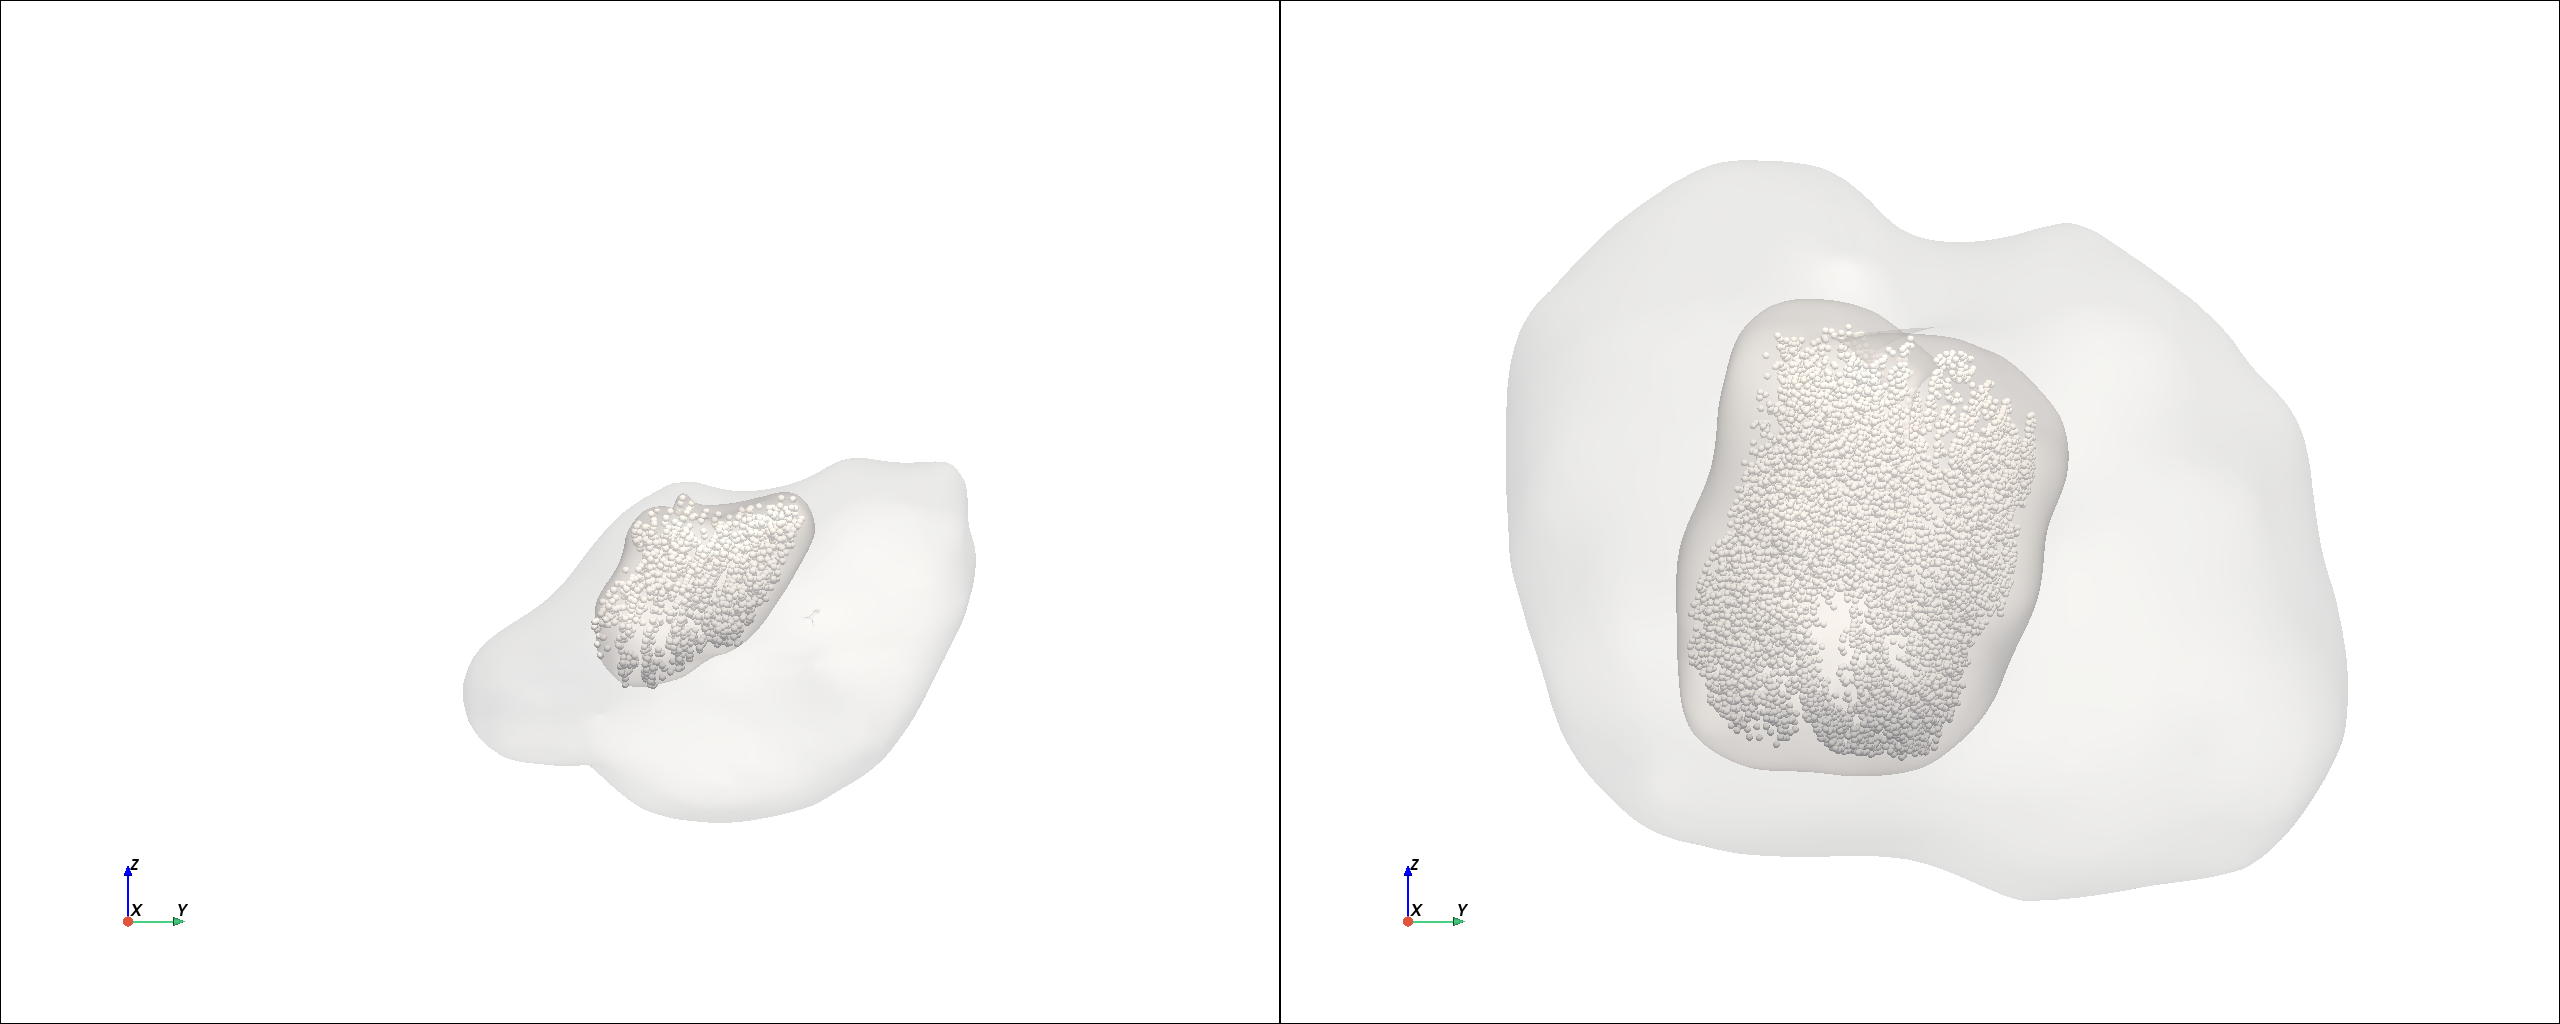

|-----> Length (x) of model: 0.1806;
|-----> Width (y) of model: 0.14126;
|-----> Height (z) of model: 0.17136;
|-----> Surface area of model: 0.07794;
|-----> Volume of model: 0.00164;
|-----> Volume / surface area ratio of model: 0.02104.
|-----> Cell density of model: 937804.87805.
|-----> Length (x) of model: 0.47794;
|-----> Width (y) of model: 0.47584;
|-----> Height (z) of model: 0.53629;
|-----> Surface area of model: 0.74191;
|-----> Volume of model: 0.0524;
|-----> Volume / surface area ratio of model: 0.07063.
|-----> Cell density of model: 285629.77099.
Amount of rough clusters: 74.
Amount of rough clusters: 3817.


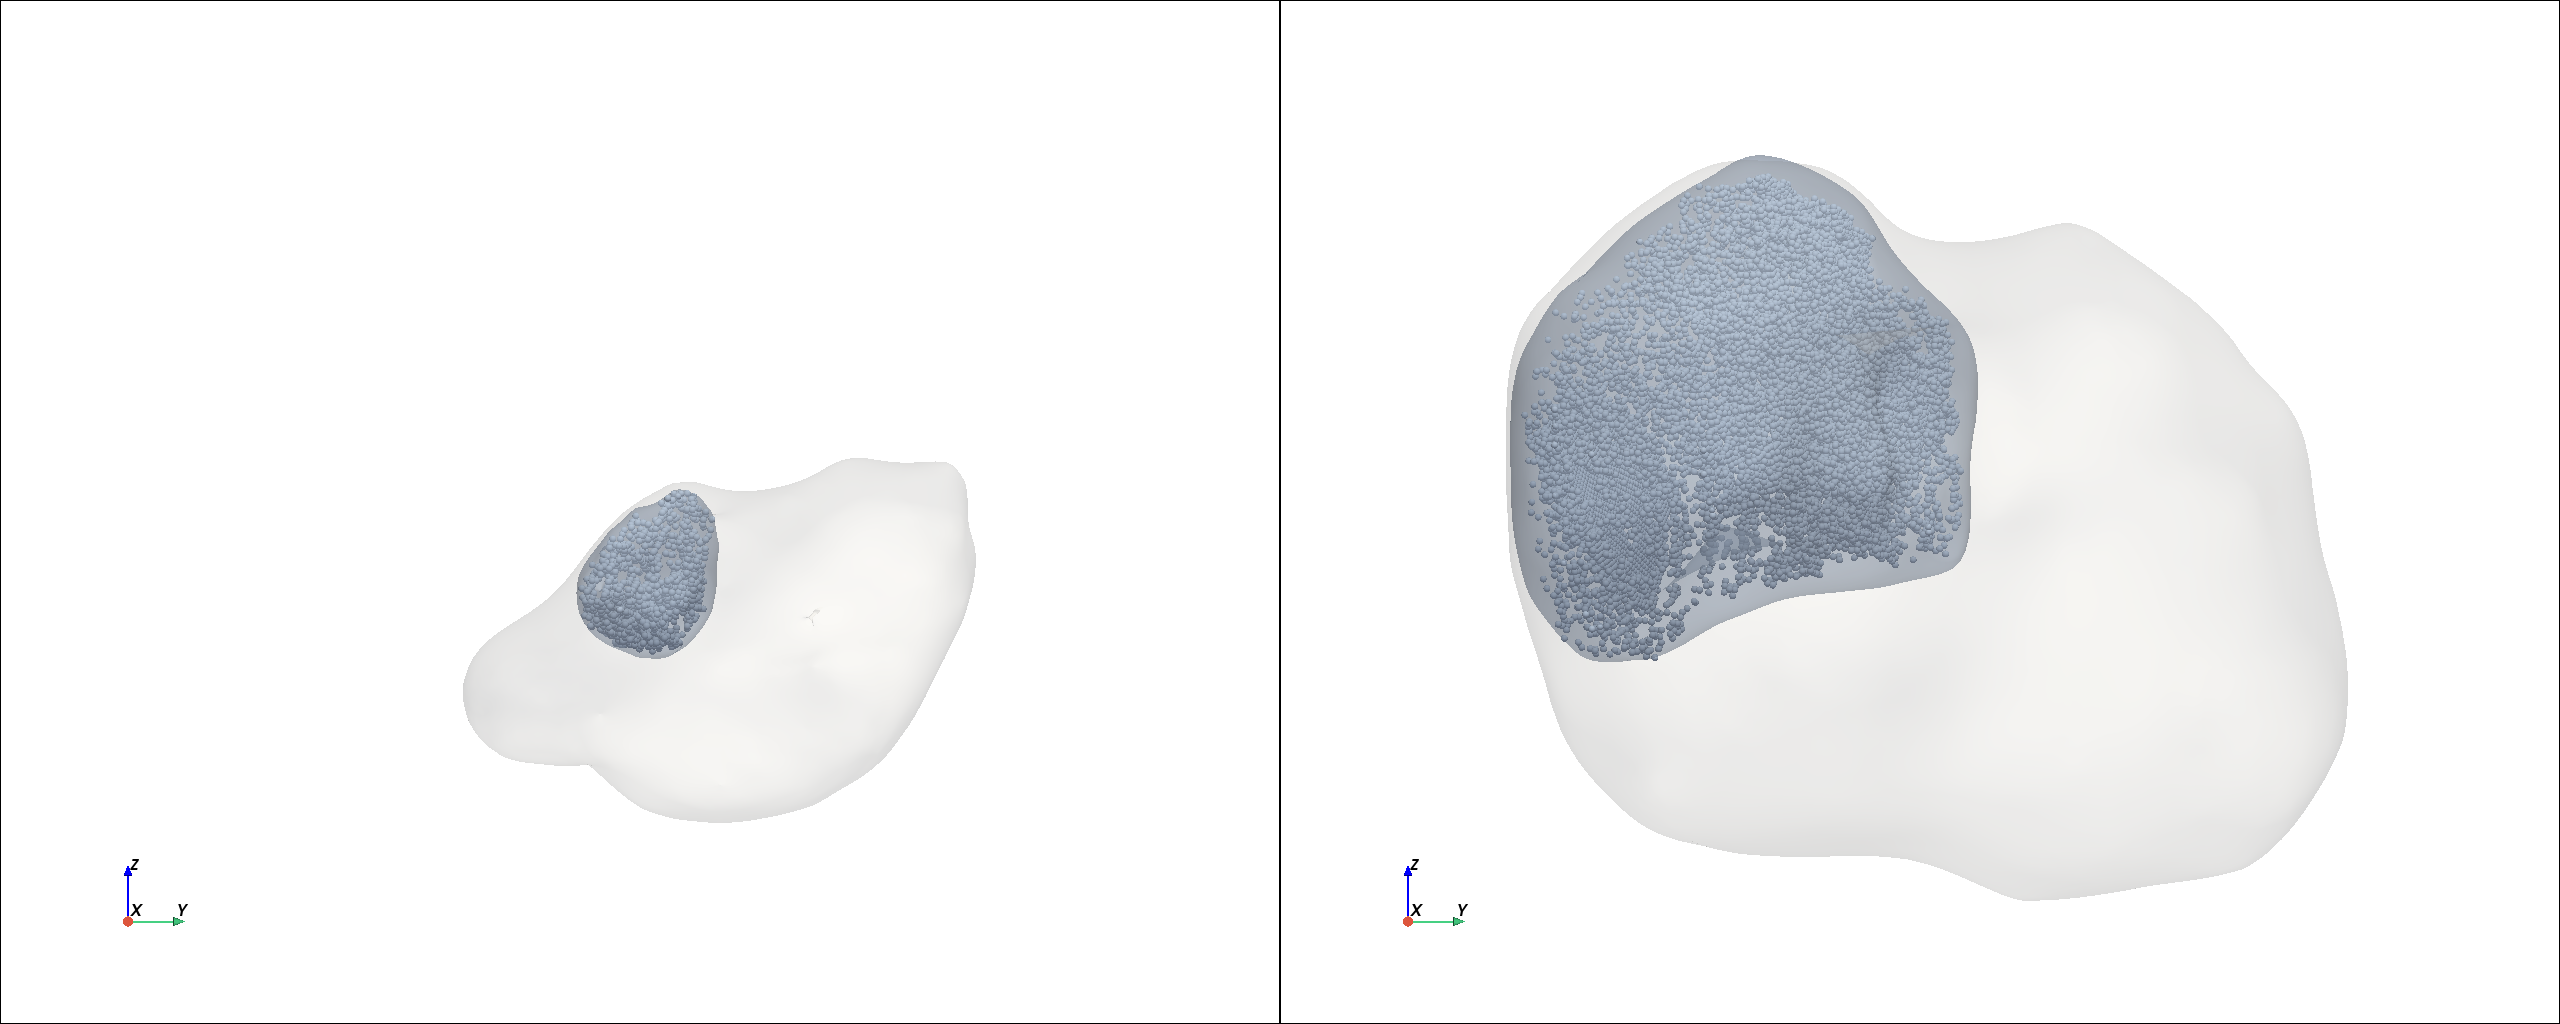

|-----> Length (x) of model: 0.22843;
|-----> Width (y) of model: 0.28136;
|-----> Height (z) of model: 0.20296;
|-----> Surface area of model: 0.1786;
|-----> Volume of model: 0.00614;
|-----> Volume / surface area ratio of model: 0.03438.
|-----> Cell density of model: 919869.70684.
|-----> Length (x) of model: 0.3653;
|-----> Width (y) of model: 0.45924;
|-----> Height (z) of model: 0.38707;
|-----> Surface area of model: 0.49969;
|-----> Volume of model: 0.02734;
|-----> Volume / surface area ratio of model: 0.05471.
|-----> Cell density of model: 422604.24287.
Amount of rough clusters: 766.
Amount of rough clusters: 3213.


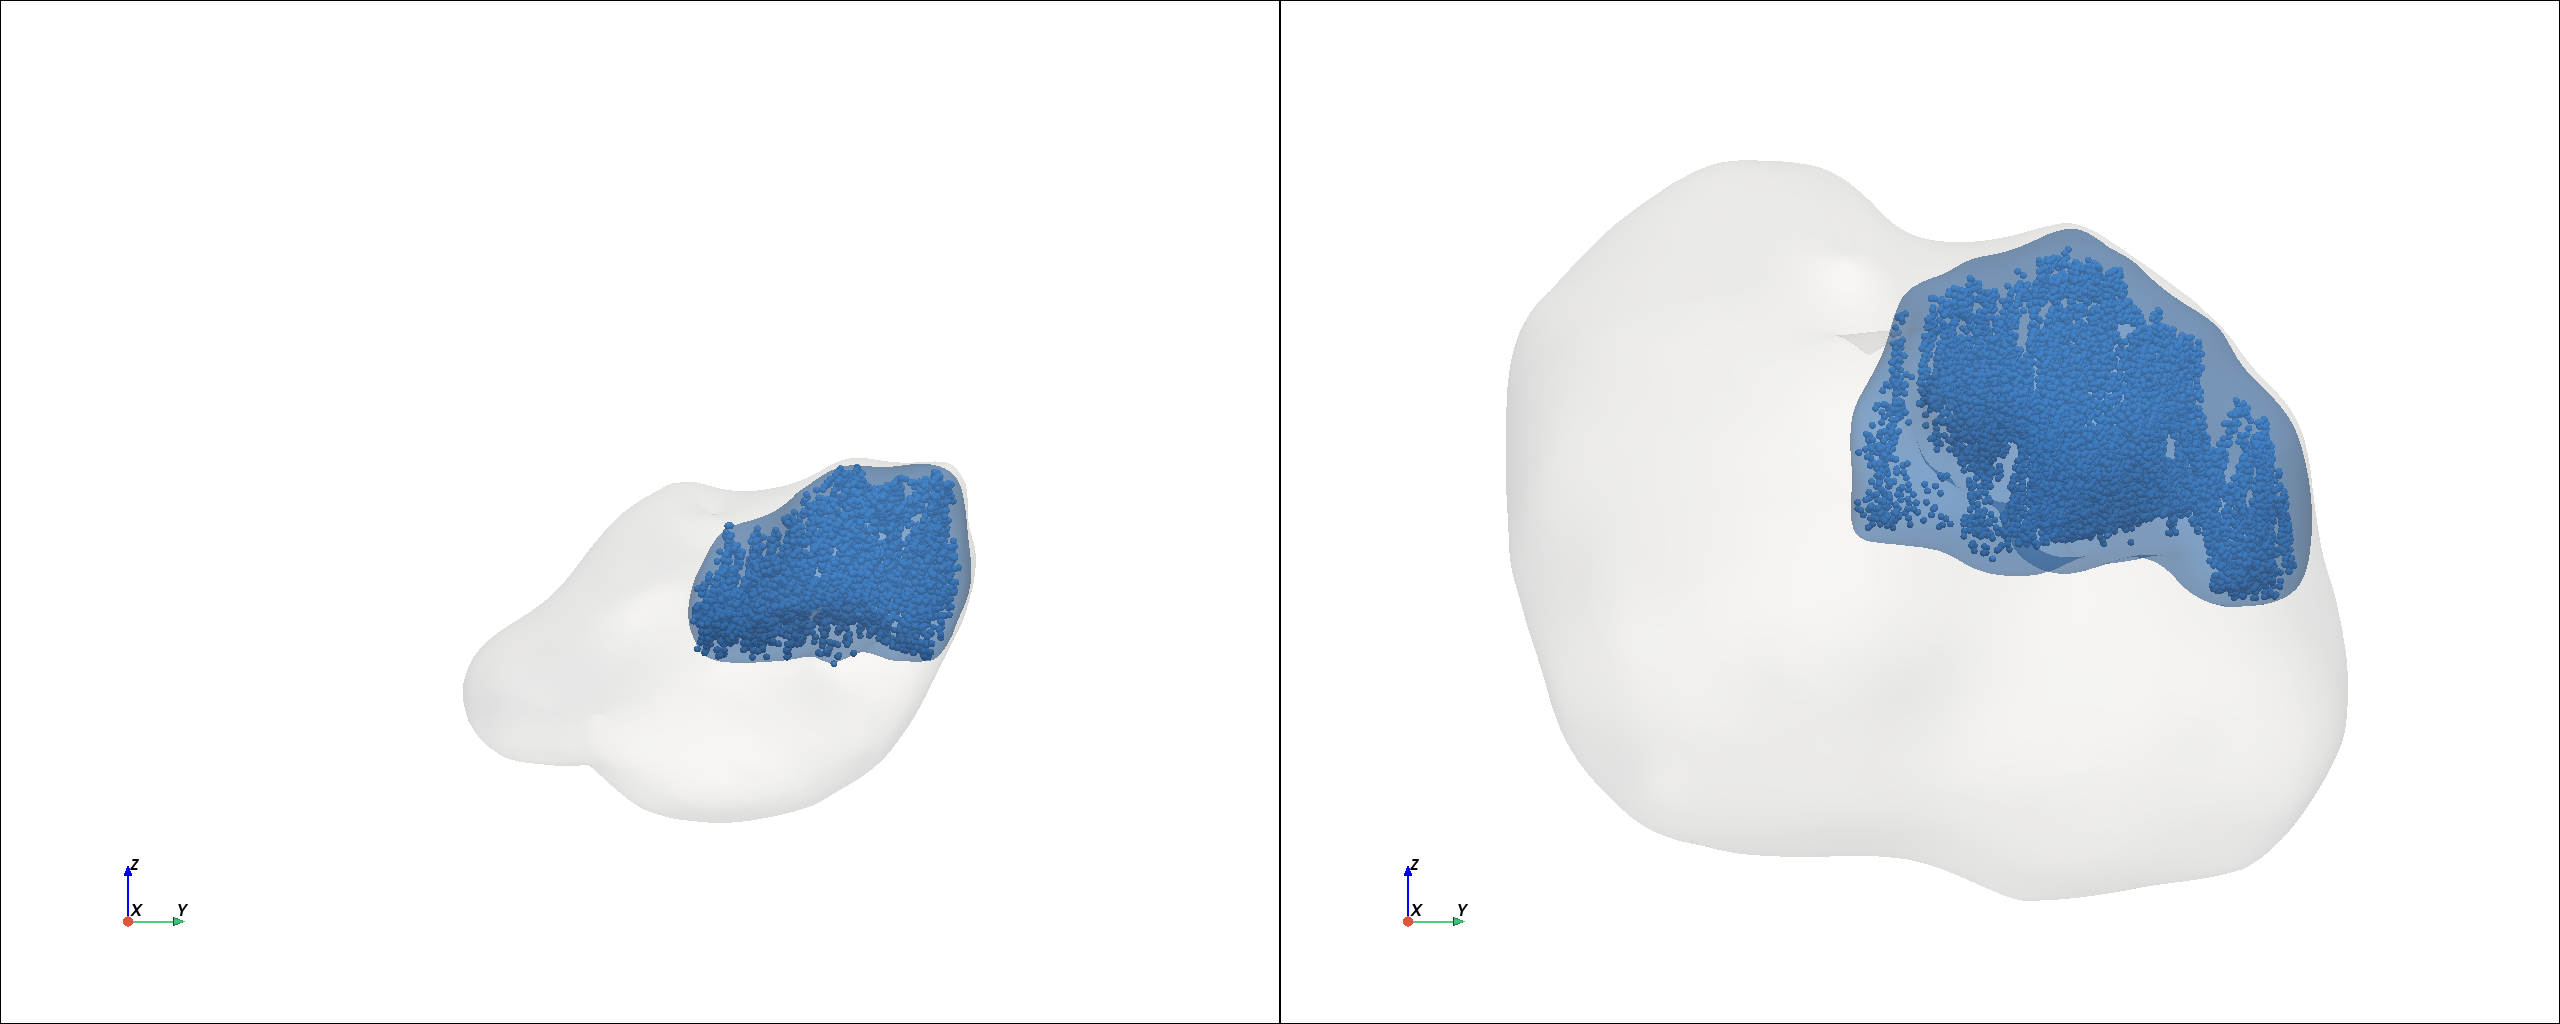

In [3]:
model_names = ['heart', 'Left ventricle', 'Right ventricle', 'Outflow tract', 'Right atrium', 'Left atrium']
model_morphology_data = {}

for mn in model_names:
    E95_pc_model = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E9.5_vtk/mouse_E9.5_{mn}_pc_model.vtk")
    E95_mesh_model = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E9.5_vtk/mouse_E9.5_{mn}_mesh_model.vtk")
    if mn != 'heart':
        E95_pc_model.points = E95_pc_model.points - np.asarray([0, -300, 0])
        E95_mesh_model.points = E95_mesh_model.points - np.asarray([0, -300, 0])
    
    E115_pc_model = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E11.5_vtk/mouse_E11.5_{mn}_pc_model.vtk")
    E115_mesh_model = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/updated_data/E11.5_vtk/mouse_E11.5_{mn}_mesh_model.vtk")
    
    mm_mesh_model, mm_pc_model = E95_mesh_model.copy(), E95_pc_model.copy()
    mm_mesh_model.points = mm_mesh_model.points / 2000 # um to mm
    mm_pc_model.points = mm_pc_model.points / 2000 # um to mm
    E95_morphology_data = st.tdr.model_morphology(model=mm_mesh_model, pc=mm_pc_model)
    E95_morphology_data["cell_num"] = E95_pc_model.n_points
    
    mm_mesh_model, mm_pc_model = E115_mesh_model.copy(), E115_pc_model.copy()
    mm_mesh_model.points = mm_mesh_model.points / 2000 # um to mm
    mm_pc_model.points = mm_pc_model.points / 2000 # um to mm
    E115_morphology_data = st.tdr.model_morphology(model=mm_mesh_model, pc=mm_pc_model)
    E115_morphology_data["cell_num"] = E115_pc_model.n_points
    
    similarity_score = st.tdr.pairwise_shape_similarity(
        model1_pcs=np.asarray(E95_pc_model.points),
        model2_pcs=np.asarray(E115_pc_model.points),
        n_subspace=40,
    )
    model_morphology_data[mn] = {'E95_morphology': E95_morphology_data, 'E115_morphology': E115_morphology_data, 'similarity_score': similarity_score}
    
    cpo = [(4132.5, 505.6, 581.8),(283.8, 505.6, 581.8), (0.0, 0.0, 1.0)]
    if mn == 'heart':
        heart_E95_mesh_model, heart_E115_mesh_model = E95_mesh_model.copy(), E115_mesh_model.copy()
        st.pl.three_d_multi_plot(
            model=st.tdr.collect_models([st.tdr.collect_models([E95_pc_model, E95_mesh_model]), st.tdr.collect_models([E115_pc_model, E115_mesh_model])]),
            key="heart_regions",
            model_style=[["points", "surface"]],
            opacity=[[1, 0.4]],
            cpo=[cpo],
            model_size=7,
            shape=(1, 2),
            colormap=None,
            show_legend=False,
            show_axes=False,
            jupyter="static",
            window_size=(1280, 1024),
        )
    else:
        st.pl.three_d_multi_plot(
            model=st.tdr.collect_models([st.tdr.collect_models([heart_E95_mesh_model, E95_pc_model, E95_mesh_model]), st.tdr.collect_models([heart_E115_mesh_model, E115_pc_model, E115_mesh_model])]),
            key="heart_regions",
            model_style=[["surface", "points", "surface"]],
            opacity=[[0.4, 1, 0.4]],
            cpo=[cpo],
            model_size=7,
            shape=(1, 2),
            colormap=None,
            show_legend=False,
            show_axes=False,
            jupyter="static",
            window_size=(1280, 1024),
        )


## Figure 6b- Different 3D morphometric features of the whole heart or each major structure between E9.5 and E11.5

In [4]:
lscmap = mpl.cm.get_cmap("vlag_r") # gist_rainbow, rainbow, hsv, tab20
regions = ["Left ventricle", "Right ventricle", "Outflow tract", "Right atrium", "Left atrium"]
regions_hex_list = [mpl.colors.to_hex(lscmap(i)) for i in np.linspace(0, 1, len(regions))]
regions_colors = {i: j for i, j in zip(regions, regions_hex_list)}
regions_colors["heart"] = "gainsboro"

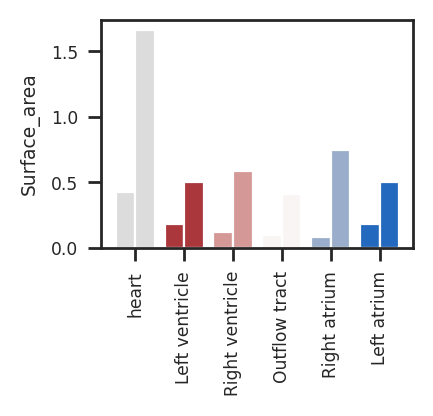

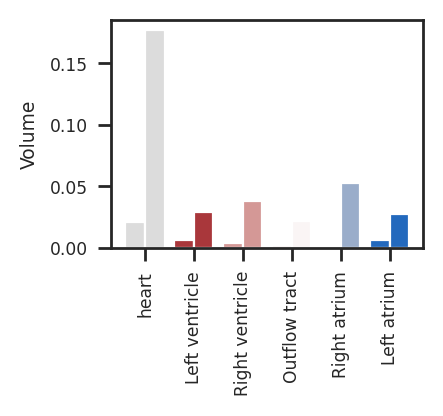

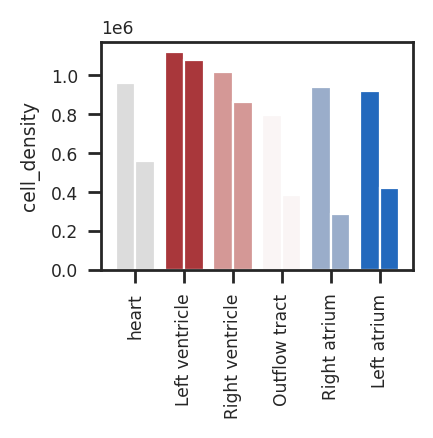

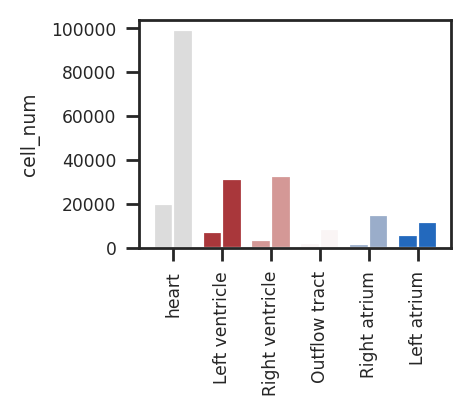

In [5]:
for key in ["Surface_area", "Volume", "cell_density", "cell_num"]:
    comparsion_values, comparsion_index, comparsion_regions, comparsion_stages = [], [], [], []
    for mn in model_names:
        comparsion_values.extend([model_morphology_data[mn]['E95_morphology'][key], model_morphology_data[mn]['E115_morphology'][key]])
        comparsion_index.extend([f'{mn}_E9.5', f'{mn}_E11.5'])
        comparsion_regions.extend([mn, mn])
        comparsion_stages.extend(['E9.5', 'E11.5'])
        
    comparsion_data = pd.DataFrame(comparsion_values, index=comparsion_index, columns=[key])
    comparsion_data["Regions"] = comparsion_regions
    comparsion_data["Stages"] = comparsion_stages
    
    sns.set_theme(context="paper", style="ticks", font_scale=0.7)
    width = 0.4
    f, ax = plt.subplots(figsize=(2, 1.5))
    for i, region in enumerate(model_names):
        _comparsion_data = comparsion_data.loc[comparsion_data["Regions"] == region, :]
        ax.bar(i - width/2, _comparsion_data.iloc[0, 0], width, color=regions_colors[region])
        ax.bar(i + width/2, _comparsion_data.iloc[1, 0], width, color=regions_colors[region])
        
    ax.set_ylabel(key)
    ax.set_xticks([0, 1, 2, 3, 4, 5], model_names)
    ax.tick_params(axis='x', labelrotation=90)
    f.show()

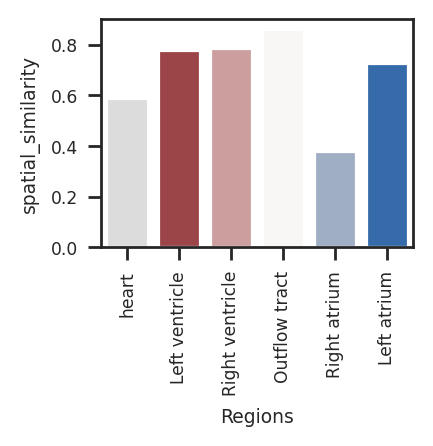

In [6]:
key = "spatial_similarity"
similarity_data = pd.DataFrame([model_morphology_data[mn]['similarity_score'] for mn in model_names], index=model_names, columns=[key])
similarity_data["Regions"] = model_names
sns.set_theme(context="paper", style="ticks", font_scale=0.7)
f, ax = plt.subplots(figsize=(2, 1.5))
g = sns.barplot(similarity_data, x="Regions", y=key, palette=regions_colors, order=model_names, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
f.show()